# 🧾 Retail Sales Analysis with Pandas DataFrames & MultiIndexing
**Total Marks:** 30

**Objective:** Provide solutions for DataFrame manipulation, aggregation, filtering, and MultiIndexing.

Goe Jie Ying A23CS0224  
Lam Yoke Yu A23CS0233  
Teh Ru Qian A23CS0191  

### Question 1: Create and Explore Sales DataFrame (5 marks)

1.1 Create a DataFrame containing at least 8 rows with the following columns:
```Region, City, Category, Units Sold, Unit Price, Month```.

##### SAMPLE DATAFRAME:
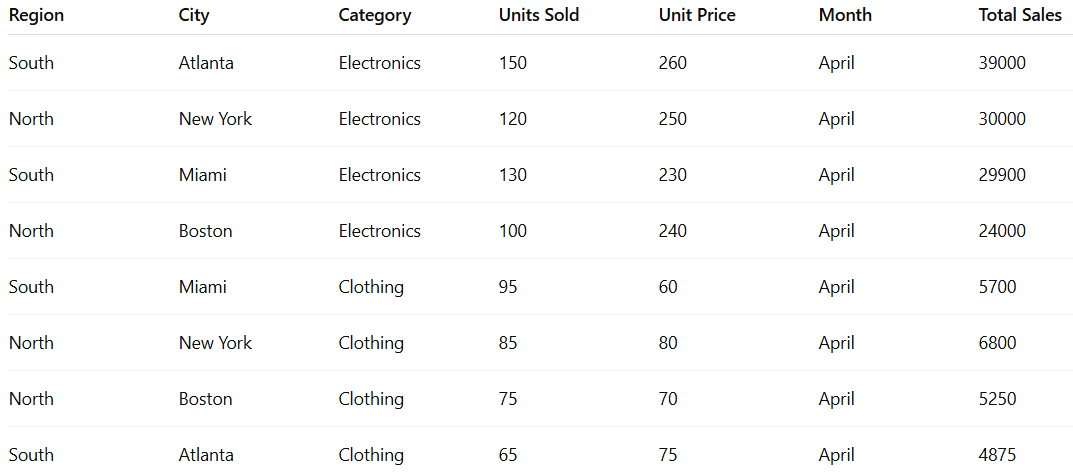

Use at least 2 regions (e.g., North, South), 2 cities per region, and 2 product categories (e.g., Electronics, Clothing). 
                                                                                                              (2 marks)

1.2 Add a column ```"Total Sales"``` = Units Sold × Unit Price. (1 mark)

1.3 Sort the DataFrame by ```"Total Sales"``` in descending order. (2 marks)

In [1]:
# Write your code here
# Question 1.1
import pandas as pd

data = {'Region': ['North', 'South','North', 'South', 'South', 'North', 'North', 'South'],
        'City': ['Boston', 'Atlanta', 'New York', 'Miami', 'Miami', 'New York', 'Boston', 'Atlanta'],
        'Category': ['Electronics', 'Electronics', 'Electronics', 'Electronics', 'Clothing', 'Clothing', 'Clothing', 'Clothing'],
        'Units Sold': [100, 150, 120, 130, 95, 85, 75, 65],
        'Unit Price': [240, 260, 250, 230, 60, 80, 70, 75],
        'Month': ['April'] * 8}

frame = pd.DataFrame(data)
print("Question 1.1")
print(frame)
print()

#Question 1.2
frame['Total Sales'] = frame['Units Sold'] * frame['Unit Price']
print("Question 1.2")
print(frame)
print()

#Question 1.3
sorted_frame = frame.sort_values(by=['Total Sales'], ascending=False)
print("Question 1.3")
print(sorted_frame)




Question 1.1
  Region      City     Category  Units Sold  Unit Price  Month
0  North    Boston  Electronics         100         240  April
1  South   Atlanta  Electronics         150         260  April
2  North  New York  Electronics         120         250  April
3  South     Miami  Electronics         130         230  April
4  South     Miami     Clothing          95          60  April
5  North  New York     Clothing          85          80  April
6  North    Boston     Clothing          75          70  April
7  South   Atlanta     Clothing          65          75  April

Question 1.2
  Region      City     Category  Units Sold  Unit Price  Month  Total Sales
0  North    Boston  Electronics         100         240  April        24000
1  South   Atlanta  Electronics         150         260  April        39000
2  North  New York  Electronics         120         250  April        30000
3  South     Miami  Electronics         130         230  April        29900
4  South     Miami     Clo

### Question 2: MultiIndexing (7 marks)

2.1 Set a MultiIndex on Region, City, and Category. Display the resulting structure. (2 marks)

2.2 Retrieve all records for "South" region and "Clothing" category. (2 marks)

2.3 Use .xs() or slicing to get sales for a specific "City" regardless of region. (1 mark)

2.4 Reset the index and show the flat DataFrame. (2 marks)


In [5]:
# Write your code here
# Question 2.1 
frame_multi = frame.set_index(['Region', 'City', 'Category'])
print("Question 2.1")
print(frame_multi.sort_index())
print()

# Question 2.2
south_clothing = frame_multi.loc[('South', slice(None), 'Clothing')]
print("Question 2.2")
print(south_clothing)
print()

# Question 2.3 if get sales fpr Miami
miami_sales = frame_multi.xs('Miami', level='City')
print("Question 2.3")
print(miami_sales)
print()

# Question 2.4
frame_flat = frame_multi.reset_index()
print("Question 2.4")
print(frame_flat)

Question 2.1
                             Units Sold  Unit Price  Month  Total Sales
Region City     Category                                               
North  Boston   Clothing             75          70  April         5250
                Electronics         100         240  April        24000
       New York Clothing             85          80  April         6800
                Electronics         120         250  April        30000
South  Atlanta  Clothing             65          75  April         4875
                Electronics         150         260  April        39000
       Miami    Clothing             95          60  April         5700
                Electronics         130         230  April        29900

Question 2.2
         Units Sold  Unit Price  Month  Total Sales
City                                               
Miami            95          60  April         5700
Atlanta          65          75  April         4875

Question 2.3
                    Units Sold 

### Question 3: Grouping and Aggregation (8 marks)
3.1 Use groupby() to calculate the total units sold per region. (2 marks)

3.2 Compute average unit price per product category. (2 marks)

3.3 Add a ```"Performance"``` column:

```"High"``` if ```Total Sales``` ≥ 10000

```"Medium"``` if 5000 ≤ ```Total Sales``` < 10000

```"Low"``` otherwise.
Use apply() or a vectorized method. (3 marks)

In [9]:
# Write your code here
# Question 3.1
total_units_per_region = frame.groupby("Region")["Units Sold"].sum()
print("Question 3.1")
print(total_units_per_region)
print()

# Question 3.2
avg_price_per_category = frame.groupby("Category")["Unit Price"].mean()
print("Question 3.2")
print(avg_price_per_category)
print()

# Question 3.3
frame['Performance'] = frame['Total Sales'].apply(
    lambda x: 'High' if x >= 10000 else 'Medium' if x >= 5000 else 'Low'
)

print("Question 3.3")
print(frame[["Region", "City", "Category", "Total Sales", "Performance"]])




Question 3.1
Region
North    380
South    440
Name: Units Sold, dtype: int64

Question 3.2
Category
Clothing        71.25
Electronics    245.00
Name: Unit Price, dtype: float64

Question 3.3
  Region      City     Category  Total Sales Performance
0  North    Boston  Electronics        24000        High
1  South   Atlanta  Electronics        39000        High
2  North  New York  Electronics        30000        High
3  South     Miami  Electronics        29900        High
4  South     Miami     Clothing         5700      Medium
5  North  New York     Clothing         6800      Medium
6  North    Boston     Clothing         5250      Medium
7  South   Atlanta     Clothing         4875         Low


### Question 4: Data Transformation (5 marks)
4.1 Normalize Units Sold and Total Sales using Min-Max scaling. (3 marks)

4.2 Save the normalized DataFrame to a CSV file called "normalized_sales.csv" (mock this). (2 marks)

In [57]:
# Write your code here
# Question 4.1
frame_normalized = frame.copy()

cols_to_normalize = ["Units Sold", "Total Sales"]

for col in cols_to_normalize:
    min_val = frame[col].min()
    max_val = frame[col].max()
    frame_normalized[col] = (frame[col] - min_val) / (max_val - min_val)

print("Question 4.1")
print(frame_normalized[["Region", "City", "Category", "Units Sold", "Total Sales"]])
print()

# Question 4.2
frame_normalized.to_csv("normalized_sales.csv", index=False)


Question 4.1
  Region      City     Category  Units Sold  Total Sales
0  North    Boston  Electronics    0.411765     0.560440
1  South   Atlanta  Electronics    1.000000     1.000000
2  North  New York  Electronics    0.647059     0.736264
3  South     Miami  Electronics    0.764706     0.733333
4  South     Miami     Clothing    0.352941     0.024176
5  North  New York     Clothing    0.235294     0.056410
6  North    Boston     Clothing    0.117647     0.010989
7  South   Atlanta     Clothing    0.000000     0.000000



### Question 5: Advanced Filtering (5 marks)
5.1 Filter the original DataFrame to show:

```"Electronics"``` category

Sold more than 100 units In the ```"North"``` region (3 marks)

5.2 From the MultiIndexed version, display all entries for a specific month (e.g., "April"). (2 marks)

In [11]:
# Write your code here
# Question 5.1
filtered_frame = frame[(frame['Category'] == 'Electronics') & (frame['Units Sold'] > 100) & (frame['Region'] == 'North')]
print("Question 5.1")
print(filtered_frame)
print()

# Question 5.2
april_entries = frame_multi[frame_multi['Month'] == 'April']
print("Question 5.2")
print(april_entries)


Question 5.1
  Region      City     Category  Units Sold  Unit Price  Month  Total Sales  \
2  North  New York  Electronics         120         250  April        30000   

  Performance  
2        High  

Question 5.2
                             Units Sold  Unit Price  Month  Total Sales
Region City     Category                                               
North  Boston   Electronics         100         240  April        24000
South  Atlanta  Electronics         150         260  April        39000
North  New York Electronics         120         250  April        30000
South  Miami    Electronics         130         230  April        29900
                Clothing             95          60  April         5700
North  New York Clothing             85          80  April         6800
       Boston   Clothing             75          70  April         5250
South  Atlanta  Clothing             65          75  April         4875
